
<a href="https://colab.research.google.com/github/hardayal/EVA/blob/master/Session_6/EVA_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>

### Importing Keras and other required library 


In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


### Loading data from CIFAR10 dataset

In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


### Display pictures of different classes

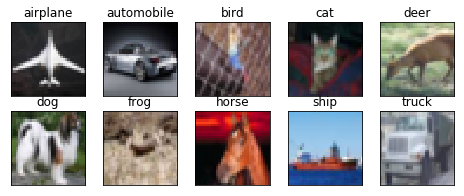

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

### Drawing model accuracy(Train vs Validation) and model loss(Train vs Valisation) from model execution history

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

### Calculating accuracy of a model from the input dataset and model

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

### Pixel normalization and using hot encoding converting the output labels into hot encoding values for train and test dataset

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

### First model which uses Relu activation, Max pooling, dropout and Dense Layer

In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0622 18:21:25.166377 140228906391424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0622 18:21:25.187300 140228906391424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0622 18:21:25.191985 140228906391424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv

### First model summary

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

####Running the model for 100 epochs and saving the best model by taking validation accuracy into account, then load the best model. 
####Draw graph of train vs validation accuracy and train vs validation loss and then whats the best validation score of this model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
  
W0622 18:25:17.490664 140228906391424 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a

Epoch 1/100
390/390 [==============================] - 13s 34ms/step - loss: 1.8680 - acc: 0.2841 - val_loss: 1.4765 - val_acc: 0.4497

Epoch 00001: val_acc improved from -inf to 0.44970, saving model to EVA_Assignment_5A.h5
Epoch 2/100
390/390 [==============================] - 9s 24ms/step - loss: 1.3821 - acc: 0.4982 - val_loss: 1.1401 - val_acc: 0.5900

Epoch 00002: val_acc improved from 0.44970 to 0.59000, saving model to EVA_Assignment_5A.h5
Epoch 3/100
390/390 [==============================] - 9s 23ms/step - loss: 1.1362 - acc: 0.5964 - val_loss: 0.9753 - val_acc: 0.6545

Epoch 00003: val_acc improved from 0.59000 to 0.65450, saving model to EVA_Assignment_5A.h5
Epoch 4/100
390/390 [==============================] - 9s 23ms/step - loss: 0.9861 - acc: 0.6544 - val_loss: 0.8831 - val_acc: 0.6915

Epoch 00004: val_acc improved from 0.65450 to 0.69150, saving model to EVA_Assignment_5A.h5
Epoch 5/100
390/390 [==============================] - 9s 24ms/step - loss: 0.8839 - acc: 0.69

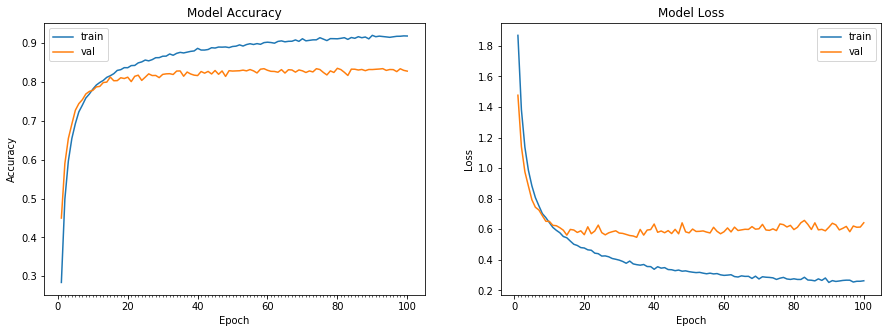

Accuracy on test data is: 83.50


In [9]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False)
checkpointer = ModelCheckpoint(filepath='EVA_Assignment_5A.h5', verbose = 1, save_best_only=True, monitor='val_acc', mode='max')


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[checkpointer])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy

# Load the weights with the best validation accuracy:
model.load_weights('EVA_Assignment_5A.h5')
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

### Objective, improve the model accuracy from the last model without using Dense Layer and less than 100 epochs

#### New Model, without using Dense Layer and added dropout where needed and introduced batch normalization.

#### Finally, drawing the model train vs validation accuracy and train vs validation loss

In [10]:
# Define the model
new_model = Sequential()
new_model.add(Convolution2D(64, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
new_model.add(Activation('relu'))#32
new_model.add(BatchNormalization())
new_model.add(Dropout(0.3))

new_model.add(Convolution2D(64, 3, 3))
new_model.add(Activation('relu'))#30
new_model.add(BatchNormalization())
new_model.add(Dropout(0.3))

new_model.add(MaxPooling2D(pool_size=(2, 2)))#15
new_model.add(Convolution2D(32, 1, activation='relu')) # Reducing channel size to 32

new_model.add(Convolution2D(64, 3, 3, border_mode='same'))
new_model.add(Activation('relu'))#15
new_model.add(BatchNormalization())
new_model.add(Dropout(0.3))

new_model.add(Convolution2D(128, 3, 3))
new_model.add(Activation('relu'))#13

new_model.add(MaxPooling2D(pool_size=(2, 2)))#6
new_model.add(Convolution2D(32, 1, activation='relu')) # Reducing channel size to 32

new_model.add(Convolution2D(64, 3, 3, border_mode='same'))
new_model.add(Activation('relu'))#6
new_model.add(BatchNormalization())
new_model.add(Dropout(0.3))

new_model.add(Convolution2D(128, 3, 3))
new_model.add(Activation('relu'))#4x4
new_model.add(BatchNormalization())
new_model.add(Dropout(0.3))

new_model.add(Convolution2D(32, 1, 1, activation='relu')) # Reducing channel size to 32
new_model.add(BatchNormalization())
new_model.add(Dropout(0.3))

new_model.add(Convolution2D(num_classes, 4, 4))#1
new_model.add(Flatten())
new_model.add(Activation('softmax'))

# Compile the model
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0622 18:43:12.041128 140228906391424 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_lau

In [11]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 64)        256       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=74)`
  del sys.path[0]


Epoch 1/74
390/390 [==============================] - 17s 43ms/step - loss: 1.7909 - acc: 0.3677 - val_loss: 1.9038 - val_acc: 0.3406

Epoch 00001: val_acc improved from -inf to 0.34060, saving model to EVA_Assignment_5A_1.h5
Epoch 2/74
390/390 [==============================] - 15s 39ms/step - loss: 1.2717 - acc: 0.5418 - val_loss: 1.1871 - val_acc: 0.5779

Epoch 00002: val_acc improved from 0.34060 to 0.57790, saving model to EVA_Assignment_5A_1.h5
Epoch 3/74
390/390 [==============================] - 15s 38ms/step - loss: 1.0468 - acc: 0.6279 - val_loss: 1.3373 - val_acc: 0.5579

Epoch 00003: val_acc did not improve from 0.57790
Epoch 4/74
390/390 [==============================] - 15s 39ms/step - loss: 0.9105 - acc: 0.6781 - val_loss: 1.4485 - val_acc: 0.5200

Epoch 00004: val_acc did not improve from 0.57790
Epoch 5/74
390/390 [==============================] - 15s 39ms/step - loss: 0.8321 - acc: 0.7058 - val_loss: 1.1284 - val_acc: 0.6300

Epoch 00005: val_acc improved from 0.577

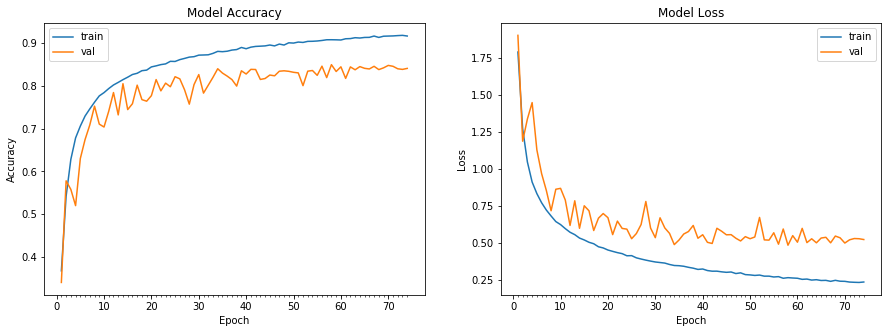

Accuracy on test data is: 84.92


In [12]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=False)
checkpointer = ModelCheckpoint(filepath='EVA_Assignment_5A_1.h5', verbose = 1, save_best_only=True, monitor='val_acc', mode='max')

# train the model
start = time.time()
# Train the model
new_model_info = new_model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 74, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[checkpointer])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(new_model_info)
# compute test accuracy

# Load the weights with the best validation accuracy:
new_model.load_weights('EVA_Assignment_5A_1.h5')
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, new_model))

#### The old model accuracy was: 83.50, and the new model accuracy is 84.92

